<a href="https://colab.research.google.com/github/Kibuye24/Week-2-Core-IP/blob/main/Joshua_Kibuye_Moringa_School_Core_IndividualProject_Week_2_Python_Exploratory_Data_Analysis_Financial_Inclusivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**

## 1. Defining the question

### a) Specifying the question


How can financial inclusion be improved in Kenya using Kenya, Rwanda, Uganda, and Tanzania as sample?

### b) Defining the metric for success

We will find the main factors affecting financial inclusion and lack thereof

### c) Understanding the context

Financial inclusion in Africa is a big problem and known to hinder development in the continent. In Kenya, Uganda, Rwanda, and Tanzania only 13.9% of the adult population have bank accounts.

### d) Recording the experimental design

### e) Data Relevance

# 2. Reading the Data

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the dataset
df = pd.read_csv('http://bit.ly/FinancialDataset')

# 3. Checking the Data

In [3]:
#Determining number of records in the dataset
df.shape

(23524, 13)

In [4]:
#previewing the top of the dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
#Previewing the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
#checking if each column has the appropriate data type
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4. External Data Source Validation

Data source validation was done by looking at information from the source of the dataset. The source of the dataset is Finscope and Finaccess of the respective countries

# 5. Data Cleaning

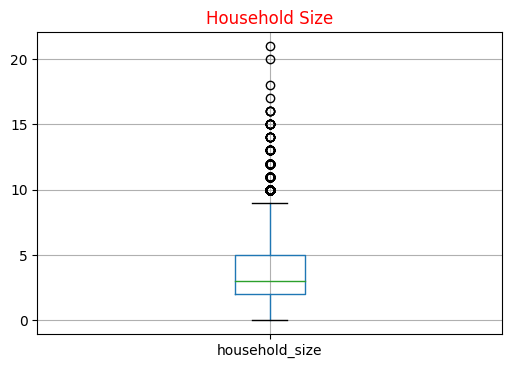

In [7]:
#Checking for outliers in household size
plt.figure(dpi=100)
df.boxplot(['household_size'])
plt.title('Household Size', color='red')
plt.show()

#Outliers are not dropped as they are true values

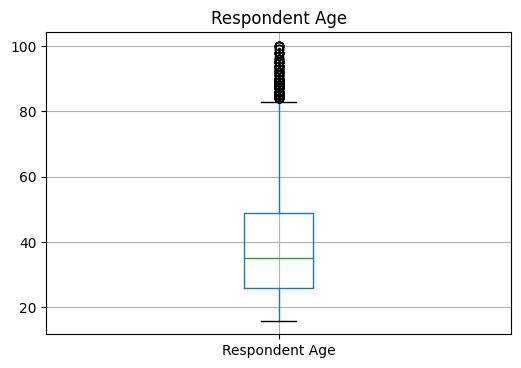

In [8]:
#checking for outliers in respondent age
plt.figure(dpi=100)
df.boxplot(['Respondent Age'])
plt.title('Respondent Age')
plt.show()

#Outliers are kept as they are true values 

In [9]:
#Checking for missing data
df.isna().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
#Dropping missing data
df.dropna(inplace=True)

In [11]:
#Checking for duplicated values
df.duplicated().sum()

0

In [12]:
#Renaming columns with messy names
df.rename(columns={'The relathip with head':'relationship with head', 'Level of Educuation':'Level of education'}, inplace=True)

In [13]:
#Dropping unecessary columns
df.drop(['uniqueid'], axis=1, inplace=True)

In [14]:
#Making columns in dataset to be uniform by lowering them and removing delimiters
df.columns = df.columns.str.lower()

In [15]:
df.columns = df.columns.str.replace("_", " ")

In [16]:
#Confirming the columns
df.columns

Index(['country', 'year', 'has a bank account', 'type of location',
       'cell phone access', 'household size', 'respondent age',
       'gender of respondent', 'relationship with head', 'marital status',
       'level of education', 'type of job'],
      dtype='object')

# 6. Exploratory Analysis

## 6.1 Univariate Data Analysis

In [17]:
#We look at the number of countries
df.country.value_counts()

Rwanda      8684
Tanzania    6500
Kenya       6064
Uganda      2095
Name: country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


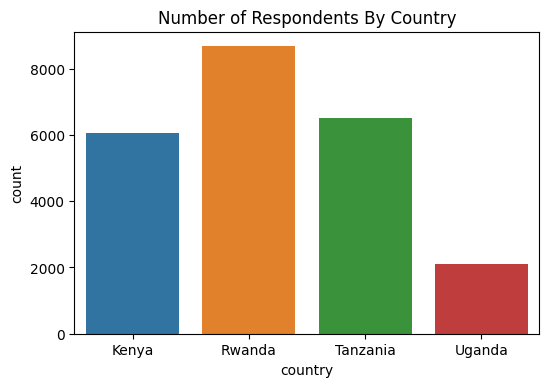

In [18]:
#We can represent the number using a bar chart
plt.figure(dpi=100)
sns.countplot(df.country)
plt.title('Number of Respondents By Country')
plt.show()

In [19]:
#We look at the number of respondents with a bank and those without a bank
accounts = df['has a bank account'].value_counts()
accounts

No     20046
Yes     3297
Name: has a bank account, dtype: int64

Most respondents don't have a bank account

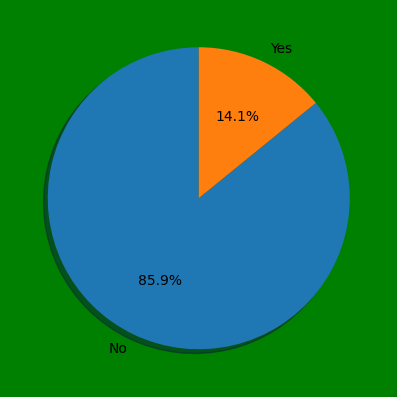

In [20]:
#We can represent that using a pie chart
accounts = df['has a bank account'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(5,5), dpi=100, facecolor='green')
plt.pie(values, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


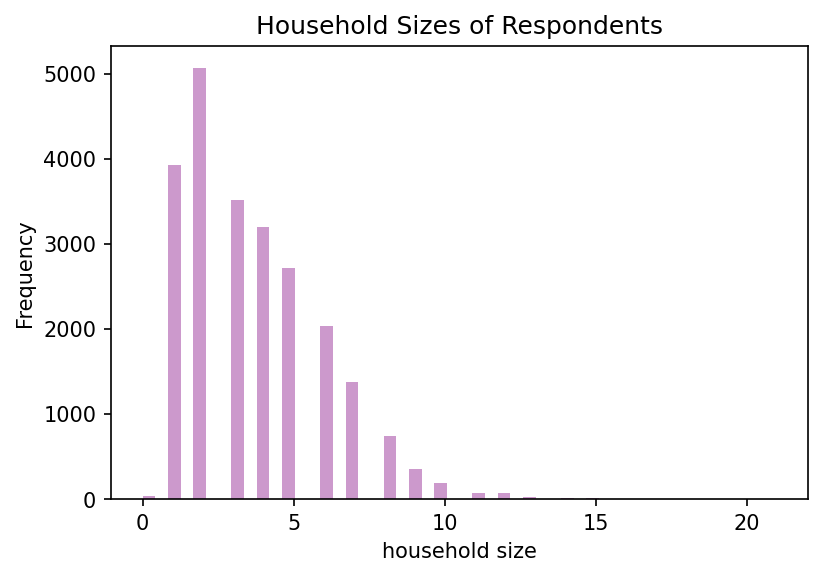

In [21]:
#Information of respondents household sizes
plt.figure(dpi=150)
sns.distplot(df['household size'], kde=False, color='purple')
plt.ylabel('Frequency')
plt.title('Household Sizes of Respondents')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


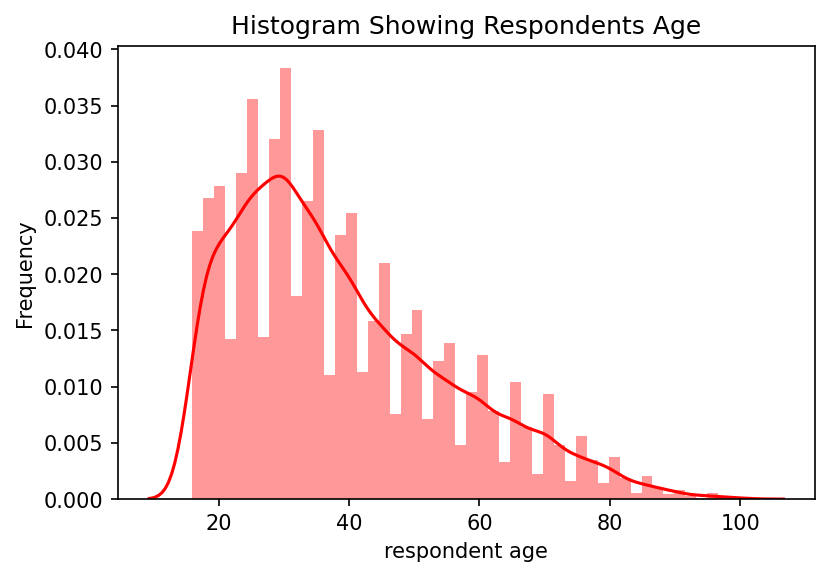

In [22]:
#Information of respondent age
plt.figure(dpi=150)
sns.distplot(df['respondent age'], kde=True, color='red')
plt.ylabel('Frequency')
plt.title('Histogram Showing Respondents Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

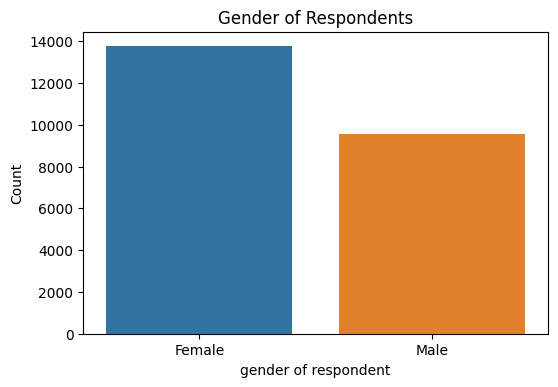

In [23]:
plt.figure(dpi=100)
sns.countplot(df['gender of respondent'])
plt.title('Gender of Respondents')
plt.ylabel('Count')
plt.show

In [24]:
#We can also look at the level of education of most respondents
education = pd.crosstab(index = df['level of education'], columns = 'count')
education

col_0,count
level of education,
6,27
No formal education,4467
Other/Dont know/RTA,8
Primary education,12689
Secondary education,4207
Tertiary education,1144
Vocational/Specialised training,801


In [25]:
#We can also look at a description of the dataset
df.describe()

,year,household size,respondent age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [26]:
#Finding the median of the dataset
df.median()

year              2017.0
household size       3.0
respondent age      35.0
dtype: float64

In [27]:
#finding the mode of the household size and respondent age
print(df['household size'].mode())
print(df['respondent age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


## 6.2 Bivariate Data Analysis

Bivariate Analysis is done to compare two variables. The quantifiable variables in this dataset are age and household size

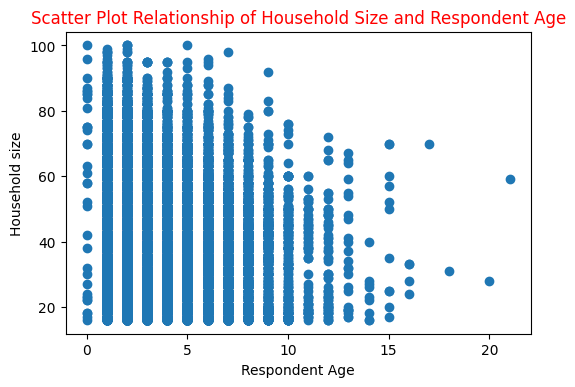

In [28]:
#Scatter plot of household size and respondents age
plt.figure(dpi=100)
plt.scatter(df['household size'], df['respondent age'])
plt.xlabel('Respondent Age')
plt.ylabel('Household size')
plt.title('Scatter Plot Relationship of Household Size and Respondent Age', color='Red')
plt.show()

It can be seene there is no correlation between the household size and respondent age

In [29]:
#Correlation of household size and respondent age
df['household size'].corr(df['respondent age'])


-0.11970919507762415

In [30]:
#checking correlation of the entire dataset
df.corr()

,year,household size,respondent age
year,1.000000,-0.048902,-0.019062
household size,-0.048902,1.000000,-0.119709
respondent age,-0.019062,-0.119709,1.000000


### 6.3 Multivariate Data Analysis

Multivariate analysis compares multiple variables to get the results. In the dataset, there are only 2 numerical values. To make all levels usable, we will create a dataset of dummy variable to make comparison easy.

In [57]:
#Creating a dummy variable table
df1 = pd.get_dummies(df[['country', 'has a bank account', 'type of location', 'cell phone access', 'gender of respondent','relationship with head', 'marital status', 'level of education', 'type of job']])
df1.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has a bank account_No,has a bank account_Yes,type of location_Rural,type of location_Urban,cell phone access_No,cell phone access_Yes,gender of respondent_Female,gender of respondent_Male,relationship with head_Child,relationship with head_Head of Household,relationship with head_Other non-relatives,relationship with head_Other relative,relationship with head_Parent,relationship with head_Spouse,marital status_Divorced/Seperated,marital status_Dont know,marital status_Married/Living together,marital status_Single/Never Married,marital status_Widowed,level of education_6,level of education_No formal education,level of education_Other/Dont know/RTA,level of education_Primary education,level of education_Secondary education,level of education_Tertiary education,level of education_Vocational/Specialised training,type of job_Dont Know/Refuse to answer,type of job_Farming and Fishing,type of job_Formally employed Government,type of job_Formally employed Private,type of job_Government Dependent,type of job_Informally employed,type of job_No Income,type of job_Other Income,type of job_Remittance Dependent,type of job_Self employed
0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df2 = pd.concat([df, df1], axis = 1)
df2.head()

,country,year,has a bank account,type of location,cell phone access,household size,respondent age,gender of respondent,relationship with head,marital status,level of education,type of job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has a bank account_No,has a bank account_Yes,type of location_Rural,type of location_Urban,cell phone access_No,cell phone access_Yes,gender of respondent_Female,gender of respondent_Male,relationship with head_Child,relationship with head_Head of Household,relationship with head_Other non-relatives,relationship with head_Other relative,relationship with head_Parent,relationship with head_Spouse,marital status_Divorced/Seperated,marital status_Dont know,marital status_Married/Living together,marital status_Single/Never Married,marital status_Widowed,level of education_6,level of education_No formal education,level of education_Other/Dont know/RTA,level of education_Primary education,level of education_Secondary education,level of education_Tertiary education,level of education_Vocational/Specialised training,type of job_Dont Know/Refuse to answer,type of job_Farming and Fishing,type of job_Formally employed Government,type of job_Formally employed Private,type of job_Government Dependent,type of job_Informally employed,type of job_No Income,type of job_Other Income,type of job_Remittance Dependent,type of job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


**PRINCIPAL COMPONENT ANALYSIS**

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

In [84]:
#First, we have to divide the dataset into two parts.
#We make it into a feature set X, and a corresponding label Y
X = df2.drop(columns = ['country','has a bank account','type of location','cell phone access','household size','respondent age','gender of respondent','relationship with head','marital status','level of education','type of job'])

In [85]:
#Making the corresponding label Y
y = df2['has a bank account']

In [86]:
#Viewing the feature set
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,has a bank account_No,has a bank account_Yes,type of location_Rural,type of location_Urban,cell phone access_No,cell phone access_Yes,gender of respondent_Female,gender of respondent_Male,relationship with head_Child,relationship with head_Head of Household,relationship with head_Other non-relatives,relationship with head_Other relative,relationship with head_Parent,relationship with head_Spouse,marital status_Divorced/Seperated,marital status_Dont know,marital status_Married/Living together,marital status_Single/Never Married,marital status_Widowed,level of education_6,level of education_No formal education,level of education_Other/Dont know/RTA,level of education_Primary education,level of education_Secondary education,level of education_Tertiary education,level of education_Vocational/Specialised training,type of job_Dont Know/Refuse to answer,type of job_Farming and Fishing,type of job_Formally employed Government,type of job_Formally employed Private,type of job_Government Dependent,type of job_Informally employed,type of job_No Income,type of job_Other Income,type of job_Remittance Dependent,type of job_Self employed
0,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [87]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has a bank account, dtype: object

In [88]:
#Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
#Normalization step
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [91]:
#Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.82088743e-02, 8.26458346e-02, 6.76655589e-02, 5.74912505e-02,
       5.04235840e-02, 4.88357492e-02, 3.83769072e-02, 3.65150844e-02,
       3.60609263e-02, 3.27998975e-02, 3.25133916e-02, 3.20691065e-02,
       3.02344359e-02, 2.87425894e-02, 2.60184764e-02, 2.55016915e-02,
       2.45779558e-02, 2.40282867e-02, 2.35091007e-02, 2.32383015e-02,
       2.25138463e-02, 2.16141777e-02, 2.04933433e-02, 1.94476782e-02,
       1.88961796e-02, 1.64570028e-02, 1.42423566e-02, 1.21289823e-02,
       1.09673523e-02, 9.12034807e-03, 7.71798110e-03, 6.94374890e-03,
       4.96526272e-31, 2.32553403e-31, 1.79946506e-31, 7.29260993e-32,
       6.54437273e-32, 2.21902322e-32, 1.38900297e-32, 8.83391272e-33,
       7.47652978e-33])

In [92]:
#Using one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [95]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier(max_depth=2,random_state=0 )
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [94]:
#Perfomance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy', accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


Noting with only one feature, the random forest algorithm is able to predict with an accuracy of 85.84%

# 7. Implementing the Solution

The trained model can be used to find the main reason for lack of financial inclusivity in East Africa.

# 8. Challenging the Solution

The solution can be challenged by looking at its effectiveness in changing the problem of financial inclusivity in East Africa.

# 9. Follow up Questions

## a) Did we have the right data?

Yes, the data presented valuable components showing reasons people don't have bank accounts.

## b) Do we need other data to answer our questions?

The data is sufficient to answer the question. Any more variables can be added if deemed necessary.

## c) Did we have the right question

Yes, the question highlights the main problem and a possibility for solution.